##Comparing Three Clustering Methods: 


1.   K-Means
2.   Agglomerative (Hyerarchical) Method
3.   SCBAN 



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn import cluster, metrics
from sklearn.cluster import DBSCAN
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

In [170]:
X, y = make_blobs(n_samples=300, centers=5, cluster_std=1.10, random_state=0)


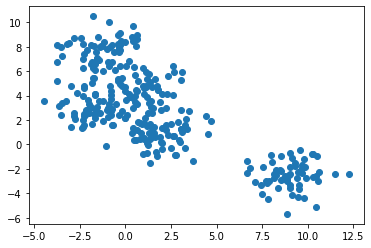

In [171]:
plt.scatter(X[:,0], X[:,1])

We graph the relationship between the number of clusters and Within Cluster Sum of Squares (WCSS) then we select the number of clusters where the change in WCSS begins to level off (elbow method): 

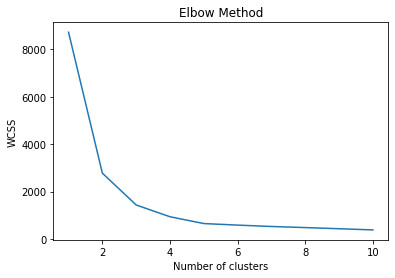

In [172]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

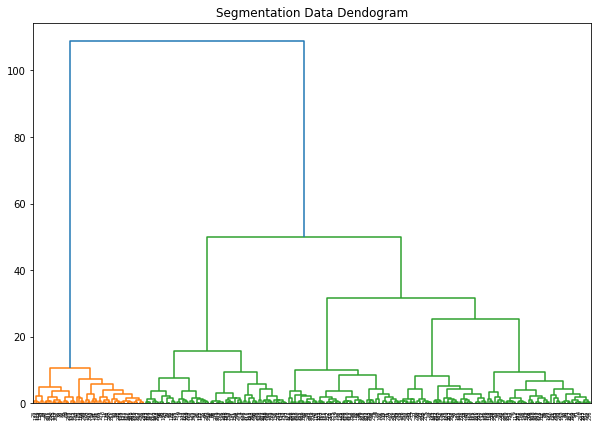

In [173]:
plt.figure(figsize=(10, 7))
plt.title("Segmentation Data Dendogram")
dend = shc.dendrogram(shc.linkage(X, method='ward'))

We implement K_mean clustering with optimal number of clusters which shown by vizualization of Elbow method and Segmantation Dendrogram: 

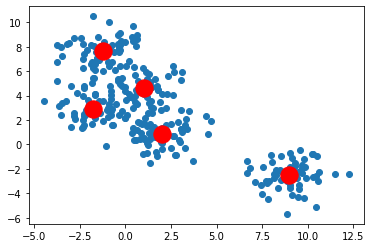

In [174]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

Let us implement DBSCAN method on the same data: 

In [175]:

db = DBSCAN(eps=0.8).fit(X)
labels = pd.DataFrame(db.labels_)

labels.rename(columns={0: "cluster"}, inplace=True)



In [176]:
xk = pd.DataFrame(X[:,0]).rename(columns={0:"X_coord"})
yk = pd.DataFrame(X[:,1]).rename(columns={0:"Y_coord"})

In [177]:
graph = pd.concat([xk,yk,labels], axis=1)


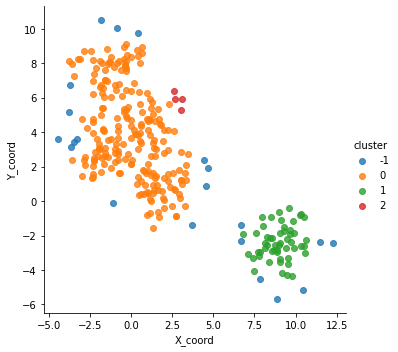

In [178]:
sns.lmplot(x='X_coord',y='Y_coord', data=graph, hue='cluster', fit_reg=False)

Finally, let us try Agglomerative Clustering (Hierarchical method): 

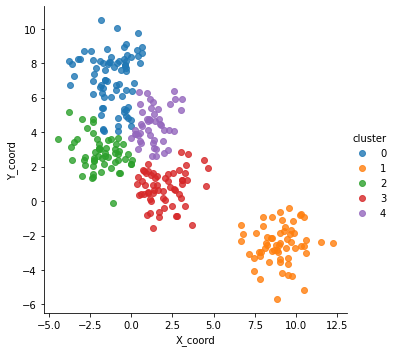

In [179]:
#cluster = AgglomerativeClustering(n_clusters=6, affinity='manhattan', linkage='average')
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
labels_ = cluster.fit_predict(X)
labelsAC = pd.DataFrame(labels_)

# cluster_centers_ give coordinated of the cluster centroid across every feature
labelsAC.rename(columns={0: "cluster"}, inplace=True)

X_orig = pd.concat([xk,yk,labelsAC], axis=1)


sns.lmplot(x='X_coord',y='Y_coord', data=X_orig, hue='cluster', fit_reg=False)

**Summary: **
I check implementation of three Clustering Methods on a generated set of blobs. 
K-means and Agglomeration Method gave absolutely same results, 
but SCBAN method is sensitive to choosing the parameters, and required more time for adjustment to get something reasonable. 